In [1]:
import numpy as np
from scipy.integrate import *
from numpy.fft import *
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.ticker import ScalarFormatter
from types import SimpleNamespace
import pickle

import sab2

In [2]:
b_vals=np.linspace(10,100,10)

In [3]:
for n in range(len(b_vals)):
    params=SimpleNamespace(d=1, m=1, R=1, rho=1.1, k=0.03, o=1, u=np.array([]), t=np.array([]), b=b_vals[n])
    
    tester=sab2.Modell()
    tester.change_params(params)
    tester.start_maker(100)
    tester.solve_ivp(200)
    
    tester.save(f'b_{b_vals[n]:.2f}')

In [4]:
b_loaded=[]
for i in range(len(b_vals)):
    b_temp=sab2.Modell(f'b_{b_vals[i]:.2f}.pkl')
    b_loaded.append(b_temp)
    
b_loaded=np.array(b_loaded)

In [5]:
for obj in b_loaded:
    obj.solution_divider()
    obj.energy_calc()

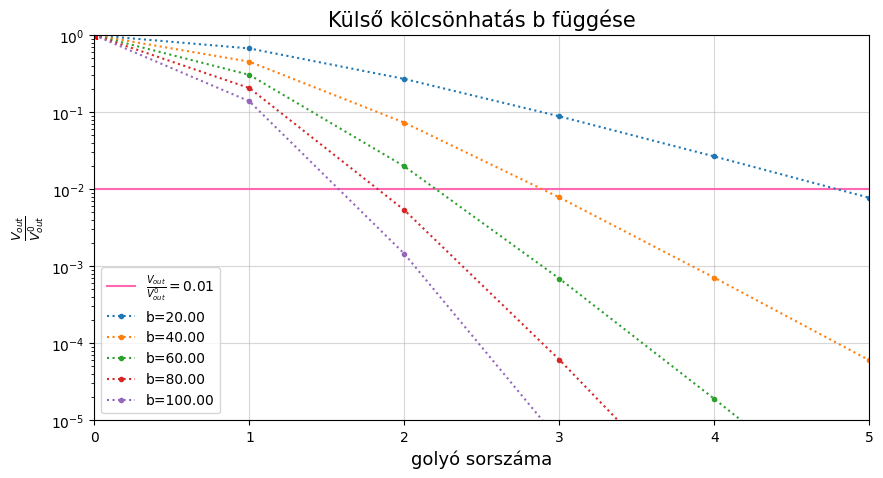

In [6]:
fig,ax=plt.subplots(figsize=(10,5))
plt.grid(alpha=0.5)
plt.xlabel('golyó sorszáma', size=13)
plt.ylabel(r'$\frac{V_{out}}{V_{out}^{0}}$', size=13)
plt.title('Külső kölcsönhatás b függése', size=15)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.plot((0,16), (1/100 , 1/100), label=r'$\frac{V_{out}}{V_{out}^{0}} = 0.01$', color='hotpink')

for obj in b_loaded[1::2]:
    idx = np.where(obj.V_out[0, :] <= obj.V_out[0, 0] / 100)[0][0] #Ahol a kölcsönhatás erőssége a fele aká csökken
    V_half = obj.V_out[0, idx]
    n_half = range(obj.n)[idx]
    
    plt.plot(range(obj.n), obj.V_out[0,:]/obj.V_out[0,0], label=f'b={obj.b:.2f}', marker='o', markersize=3, linestyle=':') #Leosztva a max értékkel.
    plt.plot(n_half, V_half/obj.V_out[0,0], marker='*', markersize='8', color='red')
    
plt.legend()
plt.xlim(0,5)
plt.ylim(1e-5,1)
ax.set_yscale('log')

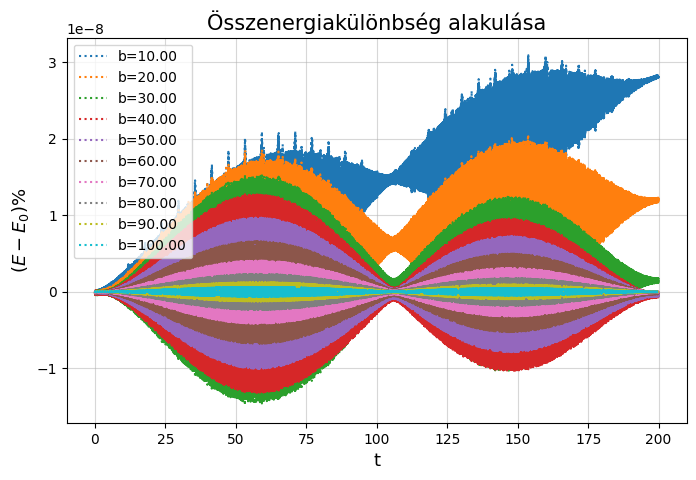

In [7]:
fig,ax=plt.subplots(figsize=(8,5))
plt.grid(alpha=0.5)
plt.xlabel('t', size=13)
plt.ylabel(r'($E-E_{0}$)%', size=13)
plt.title('Összenergiakülönbség alakulása', size=15)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

for obj in b_loaded:
    plt.plot(obj.t, ((obj.E[0]-obj.E)/obj.E[0])*100, label=f'b={obj.b:.2f}',linestyle=':') #Különbség leosztva E_0 értékkel.
    
    
plt.legend()

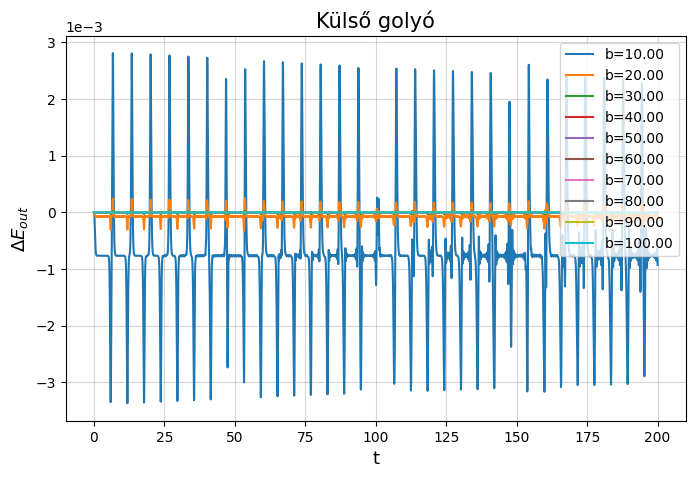

In [8]:
fig,ax=plt.subplots(figsize=(8,5))
plt.grid(alpha=0.5)
plt.xlabel('t', size=13)
plt.ylabel(r'$\Delta E_{out}$', size=13)
plt.title('Külső golyó', size=15)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

for obj in b_loaded:
    #plt.plot(obj.t, (obj.E[0]-obj.E), label=f'b={obj.b:.2f}',linestyle=':') #Különbség leosztva E_0 értékkel.
    plt.plot(obj.t, obj.K_out-obj.K_out[0], label=f'b={obj.b:.2f}')
    
    
plt.legend()

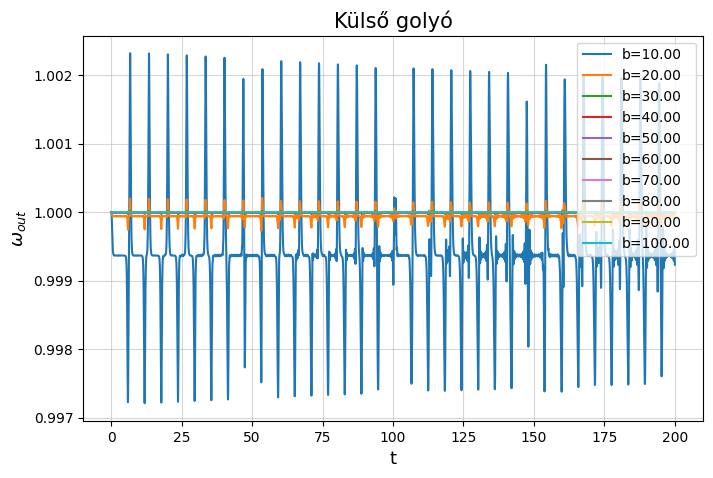

In [9]:
fig,ax=plt.subplots(figsize=(8,5))
plt.grid(alpha=0.5)
plt.xlabel('t', size=13)
plt.ylabel(r'$\omega_{out}$', size=13)
plt.title('Külső golyó', size=15)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

for obj in b_loaded:
    #plt.plot(obj.t, (obj.E[0]-obj.E), label=f'b={obj.b:.2f}',linestyle=':') #Különbség leosztva E_0 értékkel.
    plt.plot(obj.t, obj.Omega, label=f'b={obj.b:.2f}')
    
    
plt.legend()

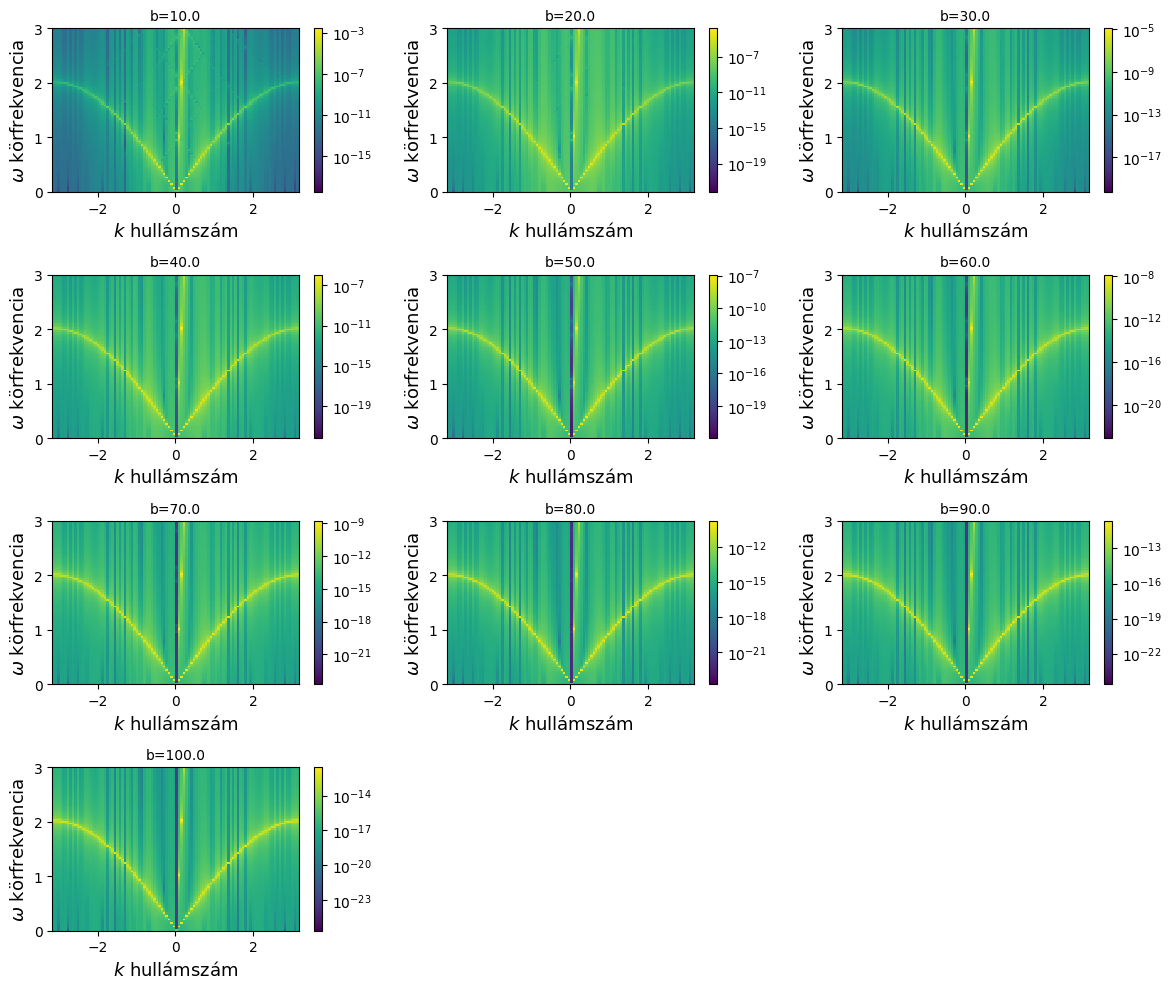

In [10]:
fig,ax=plt.subplots(4,3, figsize=(12,10))
axes_flat = ax.flatten()

for i in range(len(b_loaded)):
    b_loaded[i].phonon_spectrum(axes_flat[i])
    axes_flat[i].set_title(f'b={b_loaded[i].b}', size=10)
    axes_flat[i].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

for j in range(len(b_loaded), len(axes_flat)):
    axes_flat[j].axis('off')

plt.tight_layout()

In [11]:
o_vals=np.linspace(1e-3,1,10)

In [12]:
for n in range(len(o_vals)):
    params=SimpleNamespace(d=1, m=1, R=1, rho=1.1, k=0.03, o=o_vals[n], u=np.array([]), t=np.array([]), b=50)
    
    tester=sab2.Modell()
    tester.change_params(params)
    tester.start_maker(100)
    tester.solve_ivp(200)
    
    tester.save(f'o_{o_vals[n]:.2f}')

In [13]:
o_loaded=[]
for i in range(len(o_vals)):
    o_temp=sab2.Modell(f'o_{o_vals[i]:.2f}.pkl')
    o_loaded.append(o_temp)
    
o_loaded=np.array(o_loaded)

In [14]:
for obj in o_loaded:
    obj.solution_divider()
    obj.energy_calc()

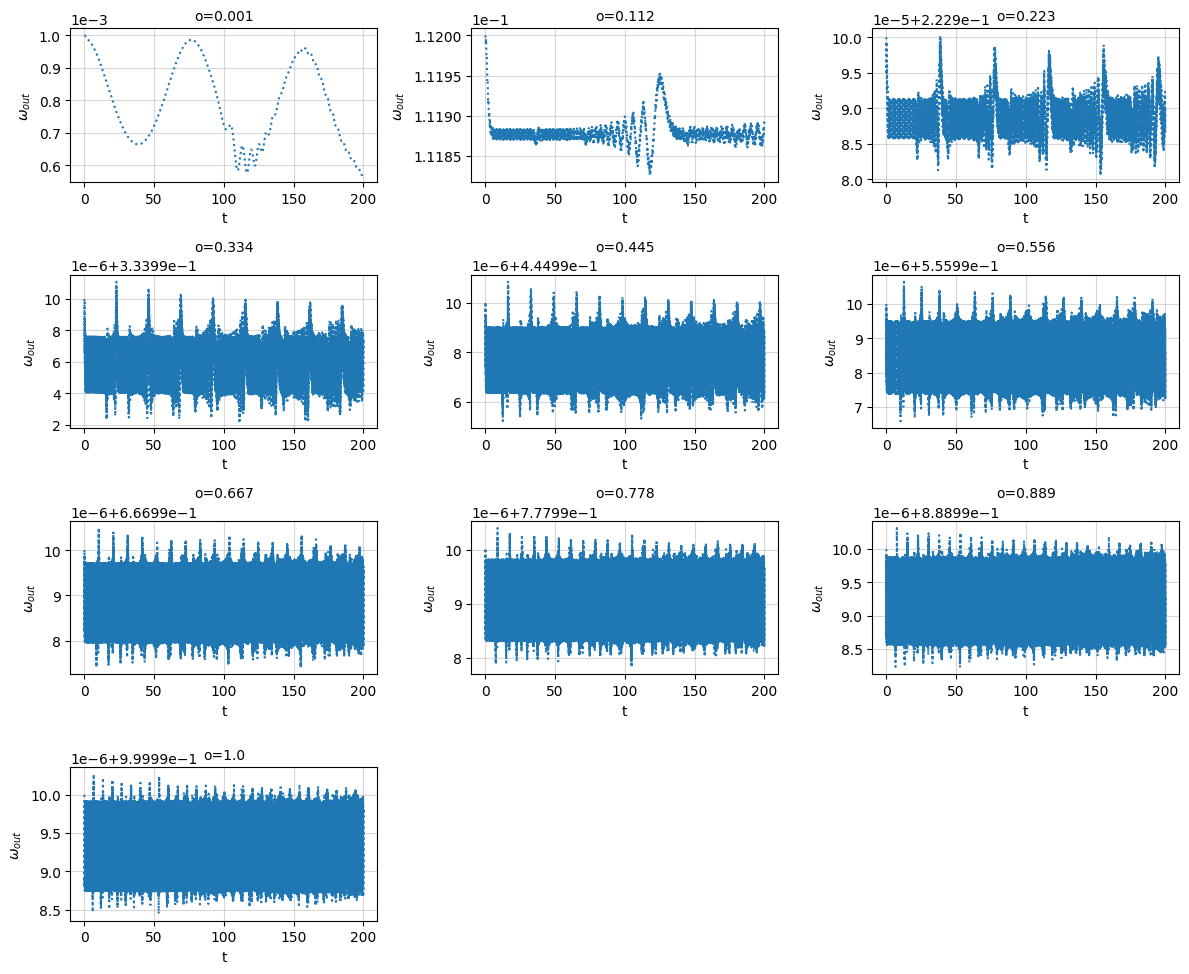

In [15]:
fig,ax=plt.subplots(4,3, figsize=(12,10))
axes_flat = ax.flatten()

for i in range(len(o_loaded)):
    axes_flat[i].plot(o_loaded[i].t, o_loaded[i].Omega, label=f'o={obj.o:.2f}', linestyle=':')
    axes_flat[i].set_title(f'o={o_loaded[i].o}', size=10)
    axes_flat[i].grid(alpha=0.5)
    axes_flat[i].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    axes_flat[i].set_ylabel(r'$\omega_{out}$')
    axes_flat[i].set_xlabel('t')

for j in range(len(o_loaded), len(axes_flat)):
    axes_flat[j].axis('off')

plt.tight_layout()

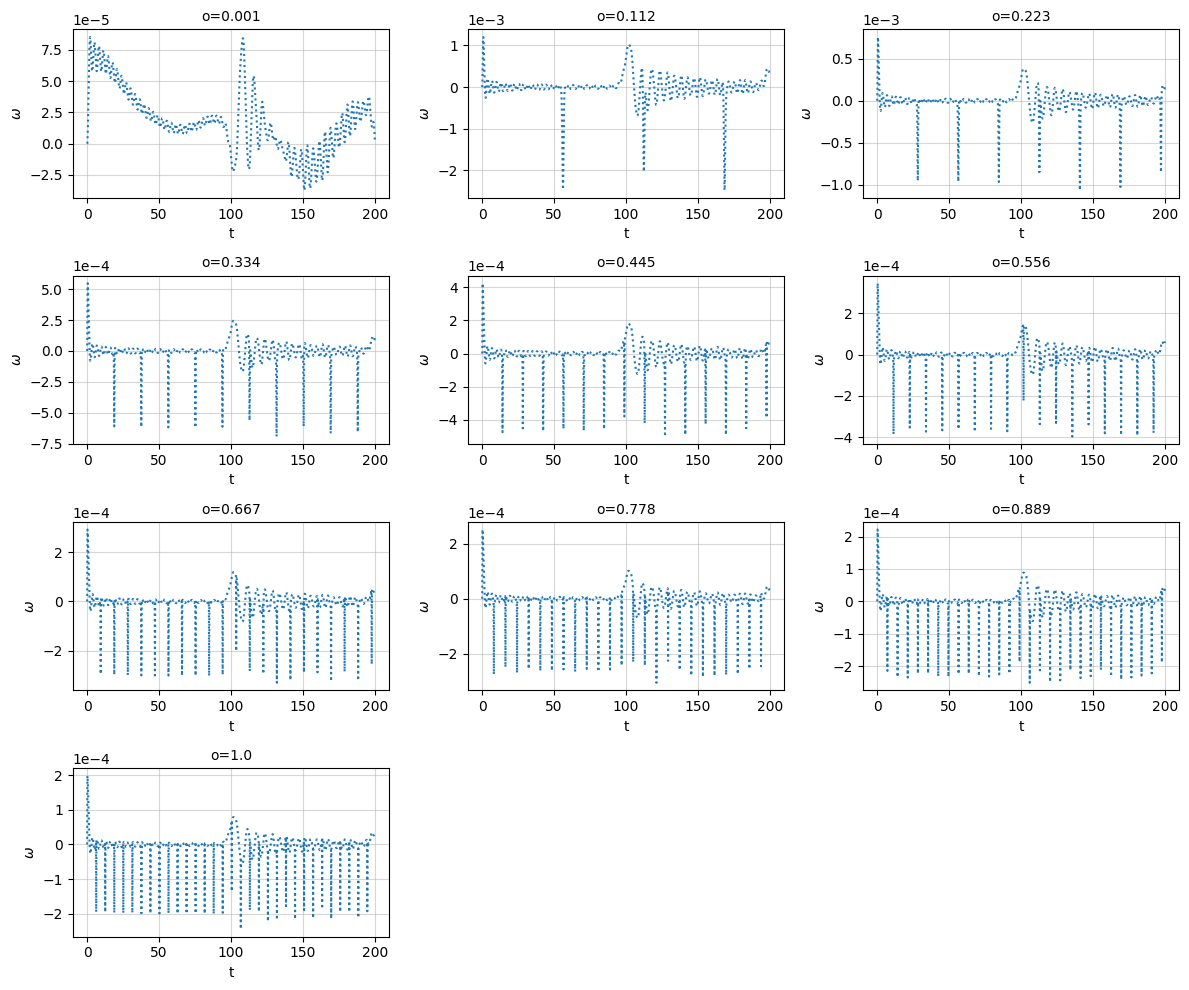

In [16]:
fig,ax=plt.subplots(4,3, figsize=(12,10))
axes_flat = ax.flatten()

for i in range(len(o_loaded)):
    omega=o_loaded[i].omega
    axes_flat[i].plot(o_loaded[i].t, omega[:,0], label=f'o={obj.o:.2f}', linestyle=':')
    axes_flat[i].set_title(f'o={o_loaded[i].o}', size=10)
    axes_flat[i].grid(alpha=0.5)
    axes_flat[i].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    axes_flat[i].set_ylabel(r'$\omega$')
    axes_flat[i].set_xlabel('t')

for j in range(len(o_loaded), len(axes_flat)):
    axes_flat[j].axis('off')

plt.tight_layout()

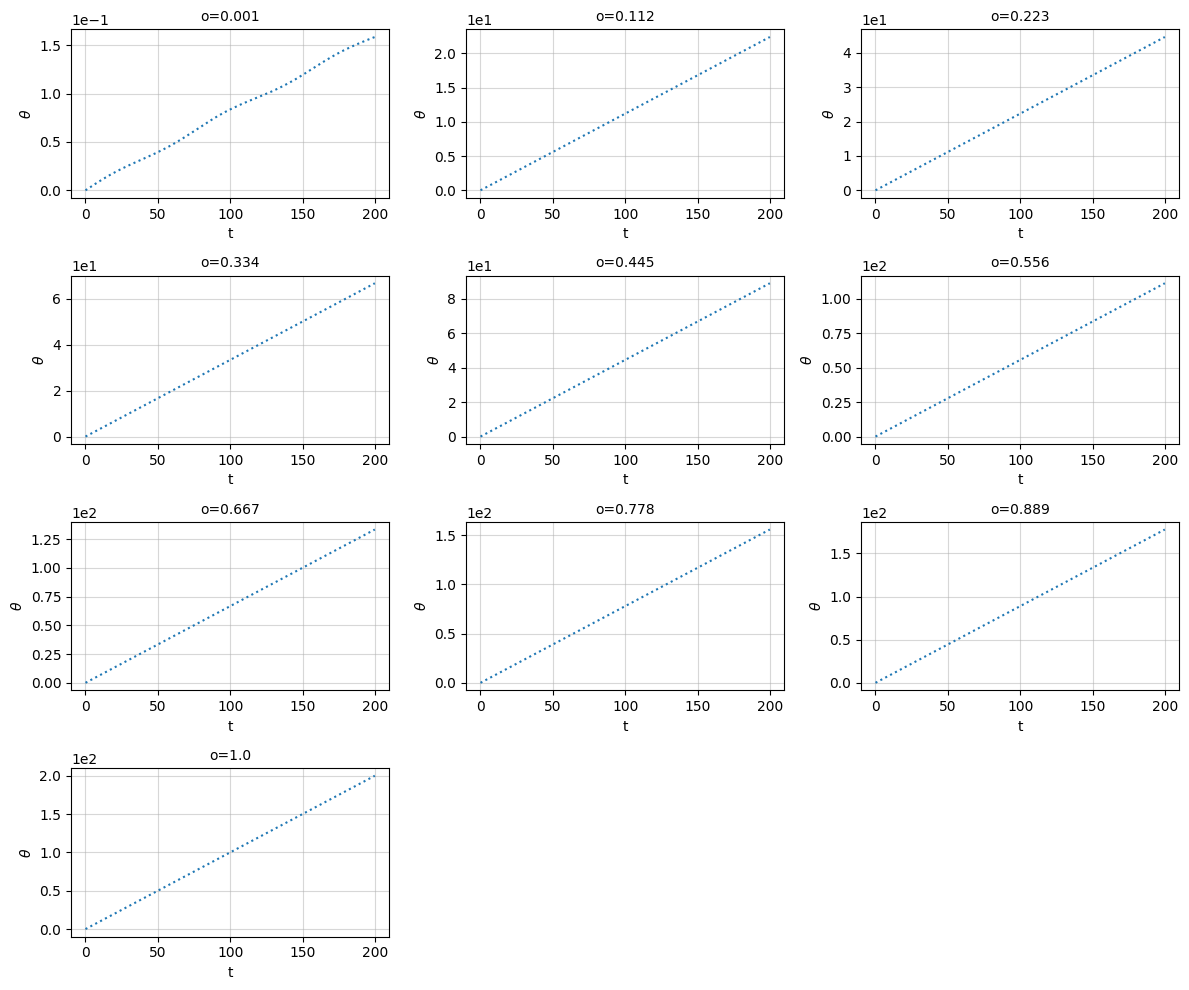

In [17]:
fig,ax=plt.subplots(4,3, figsize=(12,10))
axes_flat = ax.flatten()

for i in range(len(o_loaded)):
    axes_flat[i].plot(o_loaded[i].t, o_loaded[i].theta, label=f'o={obj.o:.2f}', linestyle=':')
    axes_flat[i].set_title(f'o={o_loaded[i].o}', size=10)
    axes_flat[i].grid(alpha=0.5)
    axes_flat[i].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    axes_flat[i].set_ylabel(r'$\theta$')
    axes_flat[i].set_xlabel('t')

for j in range(len(o_loaded), len(axes_flat)):
    axes_flat[j].axis('off')

plt.tight_layout()

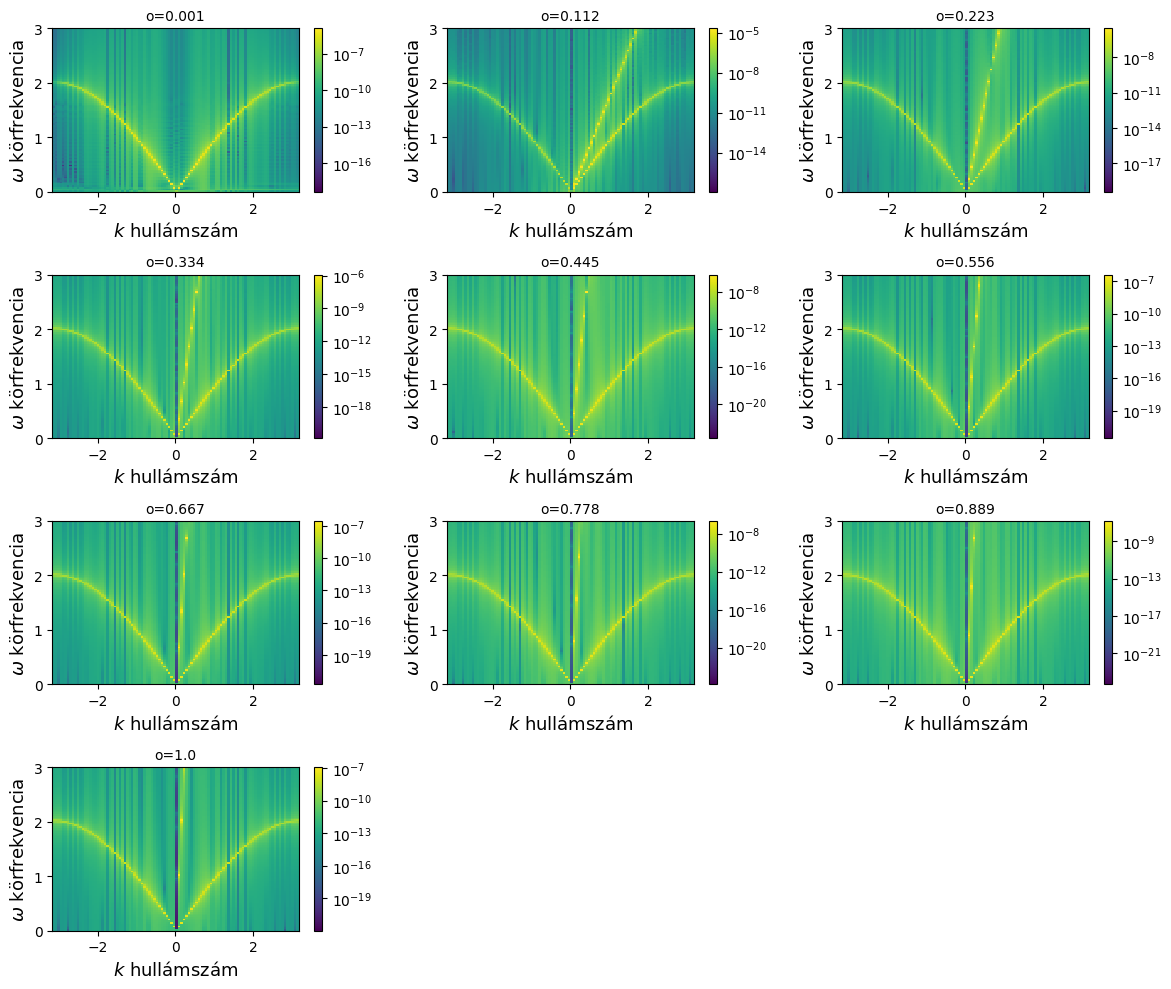

In [18]:
fig,ax=plt.subplots(4,3, figsize=(12,10))
axes_flat = ax.flatten()

for i in range(len(o_loaded)):
    o_loaded[i].phonon_spectrum(axes_flat[i])
    axes_flat[i].set_title(f'o={o_loaded[i].o}', size=10)
    axes_flat[i].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

for j in range(len(o_loaded), len(axes_flat)):
    axes_flat[j].axis('off')

plt.tight_layout()

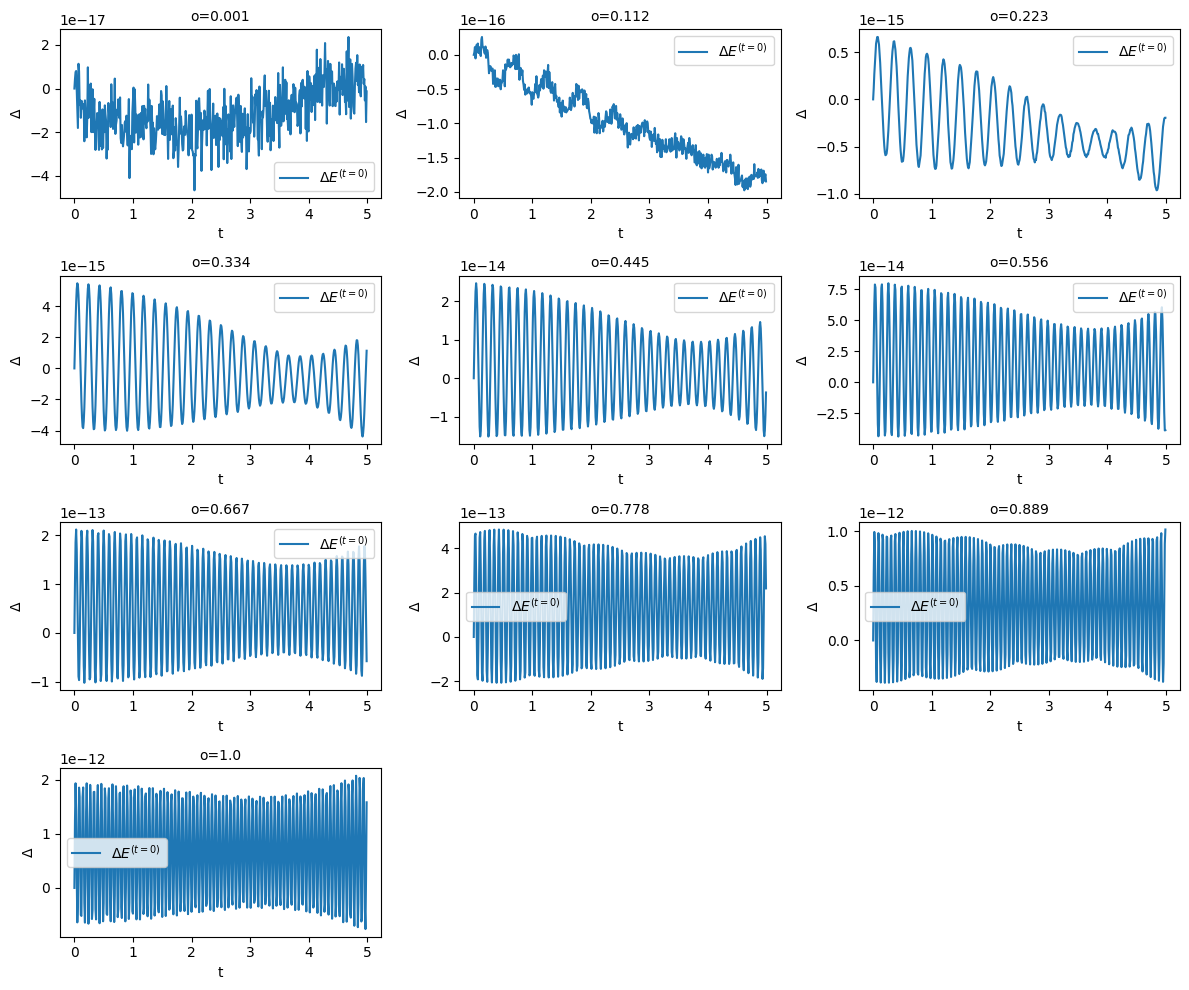

In [19]:
fig,ax=plt.subplots(4,3, figsize=(12,10))
axes_flat = ax.flatten()

for i in range(len(o_loaded)):
    t_max=5
    delta_K=(o_loaded[i].K_out-o_loaded[i].K_out[0])#/o_loaded[i].K_out[0]
    delta_E=(o_loaded[i].E-o_loaded[i].E[0])#/o_loaded[i].E[0]
    #axes_flat[i].plot(o_loaded[i].t[o_loaded[i].t<t_max],delta_K[o_loaded[i].t<t_max], label=r'$\Delta K^{(t=0)}_{out}$')
    axes_flat[i].plot(o_loaded[i].t[o_loaded[i].t<t_max], delta_E[o_loaded[i].t<t_max], label=r'$\Delta E^{(t=0)}$')
    axes_flat[i].set_title(f'o={o_loaded[i].o}', size=10)
    axes_flat[i].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    axes_flat[i].legend()
    axes_flat[i].set_xlabel('t')
    axes_flat[i].set_ylabel(r'$\Delta$')
#    axes_flat[i].set_xlim(0,50)
#     idx = np.argmin(np.abs(o_loaded[i].t - 50))
#     y_limit_2 = np.abs(o_loaded[i].E[idx] - o_loaded[i].E[0])
#     y_limit_1 = np.abs(o_loaded[i].E[o_loaded[i].t==0] - o_loaded[i].E[0])
    
#     axes_flat[i].set_ylim(y_limit_1, y_limit_2)
#    axes_flat[i].set_xlabel('t')

for j in range(len(o_loaded), len(axes_flat)):
    axes_flat[j].axis('off')

plt.tight_layout()

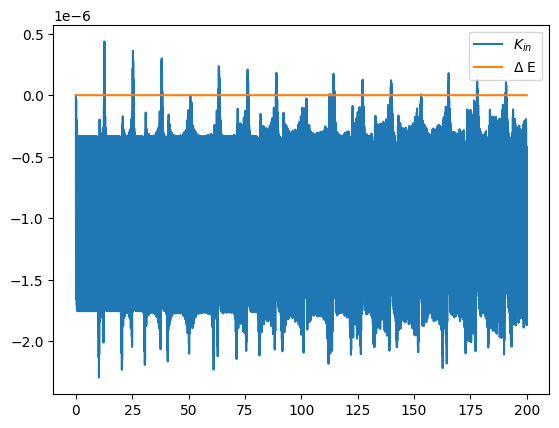

In [20]:
plt.plot(o_loaded[5].t, o_loaded[5].K_out-o_loaded[5].K_out[0], label=r'$K_{in}$')
plt.plot(o_loaded[5].t, o_loaded[5].E-o_loaded[5].E[0], label=r'$\Delta$ E')
plt.legend()

In [21]:
params=SimpleNamespace(d=1, m=1, R=1, rho=1.1, k=0.03, o=0.5, u=np.array([]), t=np.array([]), b=50)
tester=sab2.Modell()
tester.change_params(params)
tester.start_maker(3)
tester.solve_ivp(300)

tester.save(f'tester')

In [22]:
tester=sab2.Modell('tester.pkl')

In [23]:
tester.solution_divider()
tester.energy_calc()

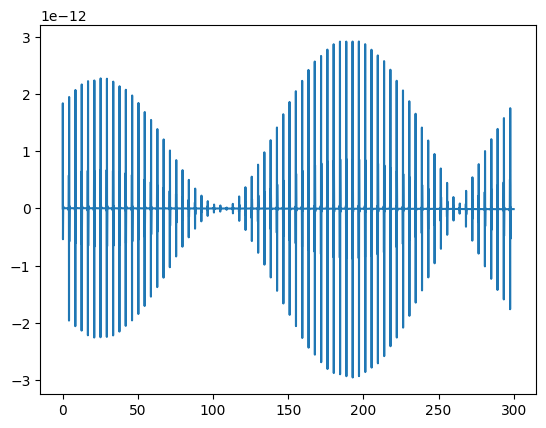

In [24]:
plt.plot(tester.t, tester.E-tester.E[0])

In [25]:
tester.E

array([0.15104786, 0.15104786, 0.15104786, ..., 0.15104786, 0.15104786,
       0.15104786], shape=(30000,))

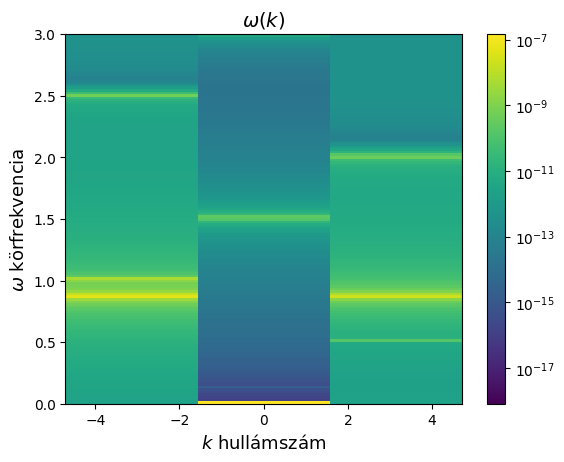

In [26]:
fig,ax=plt.subplots()
tester.phonon_spectrum(ax)

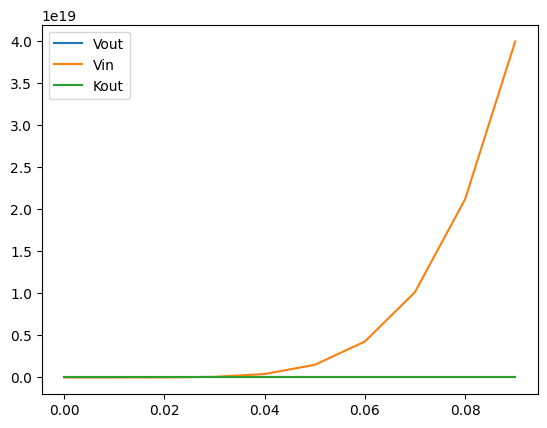

In [27]:
plt.plot(tester.t[:10], tester.V_out[:10,0]/tester.V_out[0,0], label='Vout')
plt.plot(tester.t[:10], tester.V_in[:10,0]/tester.V_in[0,0], label='Vin')
plt.plot(tester.t[:10], tester.K_out[:10]/tester.K_out[0], label='Kout')
#plt.plot(tester.t[:50], tester.K_in[:50,0]/tester.K_in[1,0], label='Kin')
plt.legend()

In [28]:
print((tester.phi-np.roll(tester.phi,1,axis=1))[0,:])

[-4.1887902  2.0943951  2.0943951]
